In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from numpy import random

In [2]:
datapath = '/home/rory/1101.csv'
data = pd.read_csv(datapath)

In [3]:
data.describe()

/home/rory/miniconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,Open,High,Low,Close,Volume_n,Volume_m,return,PE
count,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4.620000e+03,4620.000000,4620.000000
mean,19.343377,19.576335,19.074180,19.314684,14546.500216,4.053134e+05,0.046872,19.040652
std,11.721507,11.815917,11.595451,11.713021,14554.328068,4.300496e+05,2.427826,13.398284
min,3.280000,3.320000,3.250000,3.250000,878.000000,1.195000e+04,-7.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,46.390000,46.390000,45.040000,46.390000,196539.000000,6.381291e+06,7.000000,117.140000


In [4]:
def MA(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    
    for item in dataList:
        # 防止前day沒有data
        if item - day + 1 >= 0:
            # 移動平均數 = 採樣天數的股價合計 / 採樣天數
            # [item-day+1:item+1] 今日區間
            tmp = data['Close'][item-day+1:item+1].mean()
            tmpList.append(tmp)
        elif item - day + 1 < 0:
            tmp = 0
            tmpList.append(tmp)
    # 前day 沒data會出現NA
    #tmpList.reverse()
    tmpSeries = pd.Series(tmpList)
    # create  MA 欄位
    data['MA'+str(day)]=tmpSeries

In [5]:
MA(data,10)
MA(data,20)
MA(data,30)
MA(data,40)
MA(data,50)
MA(data,60)

In [6]:
data.head()

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,MA10,MA20,MA30,MA40,MA50,MA60
0,1998/1/3,12.84,12.84,12.60,12.60,1624.0,62200.0,-1.81,26.76,0.0,0.0,0.0,0.0,0.0,0.0
1,1998/1/5,12.60,12.70,12.44,12.44,4952.0,187464.0,-1.32,26.41,0.0,0.0,0.0,0.0,0.0,0.0
2,1998/1/6,12.44,12.44,12.21,12.24,3408.0,126192.0,-1.60,25.99,0.0,0.0,0.0,0.0,0.0,0.0
3,1998/1/7,12.27,12.40,12.01,12.01,3207.0,117772.0,-1.90,25.49,0.0,0.0,0.0,0.0,0.0,0.0
4,1998/1/8,11.97,12.11,11.87,11.87,3072.0,110927.0,-1.11,25.21,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Rise Ratio 漲幅比
def RR(data):
    dataList = range(data['Date'].size)
    tmpList = []
    for item in dataList:
        # 防止 第一筆data沒有更舊的
        if item - 1 >=0:
            # (今日收盤價 - 昨日收盤價)/昨日收盤價
            tmp = (data['Close'][item-1]-data['Close'][item])/data['Close'][item]*100
            tmpList.append(tmp)
        elif item - 1 < 0:
            tmp = 0
            tmpList.append(tmp)
        
    # 前day 沒data會出現NA
    tmpSeries = pd.Series(tmpList)
    # create  RR 欄位
    data['RR']=tmpSeries

In [8]:
RR(data)

In [9]:
# 威廉指標(WMS%R或%R)
def WMS(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    
    for item in dataList:
        # 防止前day沒有data
        if item-day+1 >= 0:
            # 9日WMS%R =(9日內最高價-第9日收盤價) / (9日內最高價-9日內最低價)*100
            # [item-day+1:item+1] 今日區間 [item-day+1] 第N日 583-9=574+1=575
            tmp = (data['High'][item-day+1:item+1].max()-data['Close'][item-day+1])/(data['High'][item-day+1:item+1].max()-data['Low'][item-day+1:item+1].min())*100
            tmpList.append(tmp)
        elif item - day + 1 < 0:
            tmp = 0
            tmpList.append(tmp)
            
    # 前day 沒data會出現NA
    tmpSeries = pd.Series(tmpList)
    # create  WMS 欄位
    data['WMS'+str(day)]=tmpSeries

In [10]:
WMS(data,5)
WMS(data,9)
WMS(data,13)
WMS(data,17)

In [11]:
#data=data.drop(['WMS'], axis=1)
data.head()

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,MA10,MA20,MA30,MA40,MA50,MA60,RR,WMS5,WMS9,WMS13,WMS17
0,1998/1/3,12.84,12.84,12.60,12.60,1624.0,62200.0,-1.81,26.76,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,1998/1/5,12.60,12.70,12.44,12.44,4952.0,187464.0,-1.32,26.41,0.0,0.0,0.0,0.0,0.0,0.0,1.286174,0.000000,0.0,0.0,0.0
2,1998/1/6,12.44,12.44,12.21,12.24,3408.0,126192.0,-1.60,25.99,0.0,0.0,0.0,0.0,0.0,0.0,1.633987,0.000000,0.0,0.0,0.0
3,1998/1/7,12.27,12.40,12.01,12.01,3207.0,117772.0,-1.90,25.49,0.0,0.0,0.0,0.0,0.0,0.0,1.915071,0.000000,0.0,0.0,0.0
4,1998/1/8,11.97,12.11,11.87,11.87,3072.0,110927.0,-1.11,25.21,0.0,0.0,0.0,0.0,0.0,0.0,1.179444,24.742268,0.0,0.0,0.0


In [13]:
# 買賣意願指標 day 建議26
def BR(data,day):
    # 由於 data 新到舊 0~xxx，遞增，因此需反轉陣列
    dataList = range(data['Date'].size)
    tmpList = []
    
    for item in dataList:
        # 防止前day沒有data
        if item - day >= 0:
            # 26日BR = (今日最高價 - 昨日收盤價)26天累計總數 / (昨日收盤價 - 今日最低價)26天累計總數
            # [(item-day+1)-1:(item+1)-1] 有-1 今日區間 [(item-day+1):(item+1)] 昨日區間
            tmp = (data['High'][(item-day+1)-1:(item+1)-1].sum()-data['Close'][item-day+1:item+1].sum())/(data['Close'][item-day+1:item+1].sum()-data['Low'][(item-day+1)-1:(item+1)-1].sum()+0.000001)
            #print(tmp)
            tmpList.append(tmp)
        elif item - day < 0:
            tmp = 0
            tmpList.append(tmp)        
    # 前day 沒data會出現NA
    tmpSeries = pd.Series(tmpList)
    
    # create  BR 欄位
    data['BR'+str(day)]=tmpSeries

In [14]:
BR(data,12)
BR(data,18)
BR(data,24)
BR(data,30)
BR(data,36)

In [15]:
# 買賣氣勢指標 day建議26
def AR(data,day):
    # 由於 data 新到舊 0~xxx，遞增，因此需反轉陣列
    dataList = range(data['Date'].size)
    tmpList = []
    
    for item in dataList:
        # 防止前day沒有data
        if item - day + 1 >= 0:
            # 26日AR = (最高價 - 開盤價)26天累計總數 / (開盤價 - 最低價)26天累計總數
            # [item-day+1:item+1] 今日區間
            tmp = (data['High'][item-day+1:item+1].sum()-data['Open'][item-day+1:item+1].sum())/(data['Open'][item-day+1:item+1].sum()-data['Low'][item-day+1:item+1].sum())
            #tmp = (data['High'][item-day+1:item].sum()-data['Open'][item-day+1:item].sum())/(data['Open'][item-day+1:item+1].sum()-data['Low'][item-day+1:item+1].sum())
            tmpList.append(tmp)
        elif item - day + 1 < 0:
            tmp = 0
            tmpList.append(tmp)
    # 前day 沒data會出現NA
    tmpSeries = pd.Series(tmpList)
    
    # create  AR 欄位
    data['AR' + str(day)]=tmpSeries

In [16]:
AR(data,18)
AR(data,22)
AR(data,26)
AR(data,30)

In [17]:
data.head()

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,MA10,...,WMS17,BR12,BR18,BR24,BR30,BR36,AR18,AR22,AR26,AR30
0,1998/1/3,12.84,12.84,12.60,12.60,1624.0,62200.0,-1.81,26.76,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1998/1/5,12.60,12.70,12.44,12.44,4952.0,187464.0,-1.32,26.41,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1998/1/6,12.44,12.44,12.21,12.24,3408.0,126192.0,-1.60,25.99,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1998/1/7,12.27,12.40,12.01,12.01,3207.0,117772.0,-1.90,25.49,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1998/1/8,11.97,12.11,11.87,11.87,3072.0,110927.0,-1.11,25.21,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4621 entries, 0 to 4620
Data columns (total 29 columns):
Date        4621 non-null object
Open        4620 non-null float64
High        4620 non-null float64
Low         4620 non-null float64
Close       4620 non-null float64
Volume_n    4620 non-null float64
Volume_m    4620 non-null float64
return      4620 non-null float64
PE          4620 non-null float64
MA10        4621 non-null float64
MA20        4621 non-null float64
MA30        4621 non-null float64
MA40        4621 non-null float64
MA50        4621 non-null float64
MA60        4621 non-null float64
RR          4620 non-null float64
WMS5        4621 non-null float64
WMS9        4621 non-null float64
WMS13       4621 non-null float64
WMS17       4621 non-null float64
BR12        4621 non-null float64
BR18        4621 non-null float64
BR24        4621 non-null float64
BR30        4621 non-null float64
BR36        4621 non-null float64
AR18        4621 non-null float64
AR22      

In [19]:
# 平均成交量 mean volumn_m day建議12
def MV(data,day):
    # 由於 data 新到舊 0~xxx，遞增，因此需反轉陣列
    dataList = range(data['Date'].size)
    tmpList = []
    
    for item in dataList:
        # 防止前day沒有data
        if item - day + 1 >= 0:
            # N日平均量 = N日內的成交量總和 / N
            # [item-day+1:item+1] 今日區間
            tmp = data['Volume_m'][item-day+1:item+1].mean()
            tmpList.append(tmp)
        elif item - day + 1 < 0:
            tmp = 0
            tmpList.append(tmp)        
    # 前day 沒data會出現NA
    tmpSeries = pd.Series(tmpList)
    
    # create  MV 欄位
    data['MV'+str(day)]=tmpSeries

In [20]:
MV(data,3)
MV(data,6)
MV(data,9)
MV(data,12)
MV(data,15)

In [21]:
data.head()

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,MA10,...,BR36,AR18,AR22,AR26,AR30,MV3,MV6,MV9,MV12,MV15
0,1998/1/3,12.84,12.84,12.60,12.60,1624.0,62200.0,-1.81,26.76,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,1998/1/5,12.60,12.70,12.44,12.44,4952.0,187464.0,-1.32,26.41,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,1998/1/6,12.44,12.44,12.21,12.24,3408.0,126192.0,-1.60,25.99,0.0,...,0.0,0.0,0.0,0.0,0.0,125285.333333,0.0,0.0,0.0,0.0
3,1998/1/7,12.27,12.40,12.01,12.01,3207.0,117772.0,-1.90,25.49,0.0,...,0.0,0.0,0.0,0.0,0.0,143809.333333,0.0,0.0,0.0,0.0
4,1998/1/8,11.97,12.11,11.87,11.87,3072.0,110927.0,-1.11,25.21,0.0,...,0.0,0.0,0.0,0.0,0.0,118297.000000,0.0,0.0,0.0,0.0


In [22]:
# 心理線(PSY) 建議13
def PSY(data,day):
    # 由於 data 新到舊 0~xxx，遞增，因此需反轉陣列
    dataList = range(data['Date'].size)
    tmpList = []
    
    for item in dataList:
        # 防止前day沒有data
        if item - day >= 0:
            # 13日PSY值 = ( 13日內之上漲天數 / 13 ) * 100
            # [item-day+1-1:item+1-1] 跳一天 最早的天沒有RR值
            count = 0
            for a in data['RR'][item-day+1-1:item+1-1]:
                if a > 0:
                    count+=1
            tmp = float(count)/float(13)*100
            tmpList.append(tmp)
        elif item - day < 0:
            tmp = 0
            tmpList.append(tmp)  
        
    # 前day 沒data會出現NA
    tmpSeries = pd.Series(tmpList)
    
    # create  PSY 欄位
    data['PSY'+str(day)]=tmpSeries

In [23]:
PSY(data,7)
PSY(data,13)
PSY(data,19)
PSY(data,25)

In [24]:
data.head()

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,MA10,...,AR30,MV3,MV6,MV9,MV12,MV15,PSY7,PSY13,PSY19,PSY25
0,1998/1/3,12.84,12.84,12.60,12.60,1624.0,62200.0,-1.81,26.76,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1998/1/5,12.60,12.70,12.44,12.44,4952.0,187464.0,-1.32,26.41,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1998/1/6,12.44,12.44,12.21,12.24,3408.0,126192.0,-1.60,25.99,0.0,...,0.0,125285.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1998/1/7,12.27,12.40,12.01,12.01,3207.0,117772.0,-1.90,25.49,0.0,...,0.0,143809.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1998/1/8,11.97,12.11,11.87,11.87,3072.0,110927.0,-1.11,25.21,0.0,...,0.0,118297.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4621 entries, 0 to 4620
Data columns (total 38 columns):
Date        4621 non-null object
Open        4620 non-null float64
High        4620 non-null float64
Low         4620 non-null float64
Close       4620 non-null float64
Volume_n    4620 non-null float64
Volume_m    4620 non-null float64
return      4620 non-null float64
PE          4620 non-null float64
MA10        4621 non-null float64
MA20        4621 non-null float64
MA30        4621 non-null float64
MA40        4621 non-null float64
MA50        4621 non-null float64
MA60        4621 non-null float64
RR          4620 non-null float64
WMS5        4621 non-null float64
WMS9        4621 non-null float64
WMS13       4621 non-null float64
WMS17       4621 non-null float64
BR12        4621 non-null float64
BR18        4621 non-null float64
BR24        4621 non-null float64
BR30        4621 non-null float64
BR36        4621 non-null float64
AR18        4621 non-null float64
AR22      

In [26]:
# 能量潮(OBV) 建議12
def OBV(data,day):
    # 由於 data 新到舊 0~xxx，遞增，因此需反轉陣列
    dataList = range(data['Date'].size)
    tmpList = []
    
    for item in dataList:
        # 防止前day沒有data
        if item - day >= 0:
            # 今日OBV值 = 最近12天股價上漲日成交量總和 - 最近12天股價下跌日成交量總和
            # 先由 ['RR'] 求出boolean值 > 0 True 套入['Volume']符合True全加起來
            bolRise = data['RR'][item-day+1-1:item+1-1]>0
            sumVolRise = data['Volume_m'][item-day+1-1:item+1-1][bolRise].sum() 
            bolDesc = data['RR'][item-day+1-1:item+1-1]<0
            sumVolDesc = data['Volume_m'][item-day+1-1:item+1-1][bolDesc].sum()   
            
            tmp = sumVolRise-sumVolDesc
#             可切換 OBV累積12日移動平均值 = (最近12天股價上漲日成交量總和 - 最近12天股價下跌日成交量總和) / 12
#             tmp = (sumVolRise-sumVolDesc)/12
            tmpList.append(tmp)
        elif item - day < 0:
            tmp = 0
            tmpList.append(tmp)  
            
    # 前day 沒data會出現NA
    tmpSeries = pd.Series(tmpList)
    
    # create  OBV 欄位
    data['OBV'+str(day)]=tmpSeries

In [27]:
data.head()

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,MA10,...,AR30,MV3,MV6,MV9,MV12,MV15,PSY7,PSY13,PSY19,PSY25
0,1998/1/3,12.84,12.84,12.60,12.60,1624.0,62200.0,-1.81,26.76,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1998/1/5,12.60,12.70,12.44,12.44,4952.0,187464.0,-1.32,26.41,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1998/1/6,12.44,12.44,12.21,12.24,3408.0,126192.0,-1.60,25.99,0.0,...,0.0,125285.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1998/1/7,12.27,12.40,12.01,12.01,3207.0,117772.0,-1.90,25.49,0.0,...,0.0,143809.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1998/1/8,11.97,12.11,11.87,11.87,3072.0,110927.0,-1.11,25.21,0.0,...,0.0,118297.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4621 entries, 0 to 4620
Data columns (total 38 columns):
Date        4621 non-null object
Open        4620 non-null float64
High        4620 non-null float64
Low         4620 non-null float64
Close       4620 non-null float64
Volume_n    4620 non-null float64
Volume_m    4620 non-null float64
return      4620 non-null float64
PE          4620 non-null float64
MA10        4621 non-null float64
MA20        4621 non-null float64
MA30        4621 non-null float64
MA40        4621 non-null float64
MA50        4621 non-null float64
MA60        4621 non-null float64
RR          4620 non-null float64
WMS5        4621 non-null float64
WMS9        4621 non-null float64
WMS13       4621 non-null float64
WMS17       4621 non-null float64
BR12        4621 non-null float64
BR18        4621 non-null float64
BR24        4621 non-null float64
BR30        4621 non-null float64
BR36        4621 non-null float64
AR18        4621 non-null float64
AR22      

In [29]:
# 相對強弱指標(RSI) 建議6
def RSI(data,day):
    # 由於 data 新到舊 0~xxx，遞增，因此需反轉陣列
    dataList = range(data['Date'].size)
    tmpList = []
    
    for item in dataList:
        # 防止前day沒有data
        if item - day >= 0:
            # 6日RSI=100*6日內收盤上漲總幅度平均值 / (6日內收盤上漲總幅度平均值 - 6日內收盤下跌總幅度平均值)
            # 先由 ['RR'] 求出boolean值 > 0 True 套入['Volume']符合True全加起來
            bolRise = data['RR'][item-day+1-1:item+1-1] > 0
            meanRise = data['RR'][item-day+1-1:item+1-1][bolRise].mean() 
            bolDesc = data['RR'][item-day+1-1:item+1-1] < 0
            meanDesc = data['RR'][item-day+1-1:item+1-1][bolDesc].mean()   
            
            tmp = 100*meanRise/(meanRise-meanDesc)
            tmpList.append(tmp)
            
        elif item - day < 0:
            tmp = 0
            tmpList.append(tmp)              
    # 前day 沒data會出現NA
    tmpSeries = pd.Series(tmpList)
    
    # create  RSI 欄位
    data['RSI'+str(day)]=tmpSeries

In [30]:
RSI(data,6)
RSI(data,8)
RSI(data,10)
RSI(data,12)
RSI(data,14)

In [32]:
data.head()

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,MA10,...,MV15,PSY7,PSY13,PSY19,PSY25,RSI6,RSI8,RSI10,RSI12,RSI14
0,1998/1/3,12.84,12.84,12.60,12.60,1624.0,62200.0,-1.81,26.76,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1998/1/5,12.60,12.70,12.44,12.44,4952.0,187464.0,-1.32,26.41,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1998/1/6,12.44,12.44,12.21,12.24,3408.0,126192.0,-1.60,25.99,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1998/1/7,12.27,12.40,12.01,12.01,3207.0,117772.0,-1.90,25.49,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1998/1/8,11.97,12.11,11.87,11.87,3072.0,110927.0,-1.11,25.21,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4621 entries, 0 to 4620
Data columns (total 43 columns):
Date        4621 non-null object
Open        4620 non-null float64
High        4620 non-null float64
Low         4620 non-null float64
Close       4620 non-null float64
Volume_n    4620 non-null float64
Volume_m    4620 non-null float64
return      4620 non-null float64
PE          4620 non-null float64
MA10        4621 non-null float64
MA20        4621 non-null float64
MA30        4621 non-null float64
MA40        4621 non-null float64
MA50        4621 non-null float64
MA60        4621 non-null float64
RR          4620 non-null float64
WMS5        4621 non-null float64
WMS9        4621 non-null float64
WMS13       4621 non-null float64
WMS17       4621 non-null float64
BR12        4621 non-null float64
BR18        4621 non-null float64
BR24        4621 non-null float64
BR30        4621 non-null float64
BR36        4621 non-null float64
AR18        4621 non-null float64
AR22      

In [34]:
data.head(100)

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,MA10,...,MV15,PSY7,PSY13,PSY19,PSY25,RSI6,RSI8,RSI10,RSI12,RSI14
0,1998/1/3,12.84,12.84,12.60,12.60,1624.0,62200.0,-1.81,26.76,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1998/1/5,12.60,12.70,12.44,12.44,4952.0,187464.0,-1.32,26.41,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1998/1/6,12.44,12.44,12.21,12.24,3408.0,126192.0,-1.60,25.99,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1998/1/7,12.27,12.40,12.01,12.01,3207.0,117772.0,-1.90,25.49,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1998/1/8,11.97,12.11,11.87,11.87,3072.0,110927.0,-1.11,25.21,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,1998/1/9,11.87,11.91,11.61,11.77,3892.0,137463.0,-0.84,25.00,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,1998/1/12,11.61,11.67,11.11,11.11,2892.0,99120.0,-5.63,23.59,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
7,1998/1/13,11.28,11.38,11.11,11.34,3604.0,121966.0,2.09,24.08,0.000,...,0.000000,46.153846,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
8,1998/1/14,11.51,11.64,11.38,11.58,2606.0,90755.0,2.05,24.58,0.000,...,0.000000,46.153846,0.000000,0.000000,0.000000,53.180130,51.272463,0.000000,0.000000,0.000000
9,1998/1/15,11.64,11.64,11.28,11.28,2899.0,100153.0,-2.58,23.94,11.824,...,0.000000,38.461538,0.000000,0.000000,0.000000,54.653292,51.000938,0.000000,0.000000,0.000000


In [35]:
# 乖離率(BIAS)
def BIAS(data,day):
    # 由於 data 新到舊 0~xxx，遞增，因此需反轉陣列
    dataList = range(data['Date'].size)
    tmpList = []
    
    for item in dataList:
        # 防止前day沒有data
        if item-day+1 >= 0:
            if data['MA'+str(day)][item-day+1] == 0 :
                tmp = -1
                 # N日乖離率 = (當日股價 - N日股價移動平均數) / N日平均股價
            elif data['MA'+str(day)][item-day+1] > 0 :
                tmp = (data['Close'][item-day+1]-data['MA'+str(day)][item-day+1])/(data['MA'+str(day)][item-day+1])*100
                 #print tmp#data['MA'+str(day)][item-day+1]
            tmpList.append(tmp)
        elif item - day + 1 < 0:
            tmp = 0
            tmpList.append(tmp)         
    # 前day 沒data會出現NA
    tmpSeries = pd.Series(tmpList)
    
    # create  BIAS 欄位
    data['BIAS'+str(day)] = tmpSeries

In [36]:
BIAS(data,10)
BIAS(data,20)
BIAS(data,30)
BIAS(data,40)
BIAS(data,50)
BIAS(data,60)

In [37]:
data.head(10)

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,MA10,...,RSI8,RSI10,RSI12,RSI14,BIAS10,BIAS20,BIAS30,BIAS40,BIAS50,BIAS60
0,1998/1/3,12.84,12.84,12.60,12.60,1624.0,62200.0,-1.81,26.76,0.000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1998/1/5,12.60,12.70,12.44,12.44,4952.0,187464.0,-1.32,26.41,0.000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1998/1/6,12.44,12.44,12.21,12.24,3408.0,126192.0,-1.60,25.99,0.000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1998/1/7,12.27,12.40,12.01,12.01,3207.0,117772.0,-1.90,25.49,0.000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1998/1/8,11.97,12.11,11.87,11.87,3072.0,110927.0,-1.11,25.21,0.000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1998/1/9,11.87,11.91,11.61,11.77,3892.0,137463.0,-0.84,25.00,0.000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1998/1/12,11.61,11.67,11.11,11.11,2892.0,99120.0,-5.63,23.59,0.000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1998/1/13,11.28,11.38,11.11,11.34,3604.0,121966.0,2.09,24.08,0.000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1998/1/14,11.51,11.64,11.38,11.58,2606.0,90755.0,2.05,24.58,0.000,...,51.272463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1998/1/15,11.64,11.64,11.28,11.28,2899.0,100153.0,-2.58,23.94,11.824,...,51.000938,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# 數量指標(VR) 建議12
def VR(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    
    for item in dataList:
        # 防止前day沒有data
        if item-day >= 0:
            # VR = ( N日內上漲日成交值總和 + 1/2*N日內平盤日成交值總和) / ( N日內下跌日成交值總和 + 1/2*N日內平盤日成交值總和)* 100％
            # 先由 ['RR'] 求出boolean值 > 0 True 套入['Volume']符合True全加起來
            bolRise = data['RR'][item-day+1-1:item+1-1]>0
            sumVolRise = data['Volume_m'][item-day+1-1:item+1-1][bolRise].sum()
            
            bolNorm = data['RR'][item-day+1-1:item+1-1] == 0
            sumVolNorm = data['Volume_m'][item-day+1-1:item+1-1][bolNorm].sum()
            
            bolDesc = data['RR'][item-day+1-1:item+1-1]<0
            sumVolDesc = data['Volume_m'][item-day+1-1:item+1-1][bolDesc].sum()   
            
            tmp = (sumVolRise+0.5*sumVolNorm)/(sumVolDesc+0.5*sumVolNorm+0.0000001)*100
            tmpList.append(tmp)
            
        elif item - day < 0:
            tmp = 0
            tmpList.append(tmp)              
    # 前day 沒data會出現NA
    tmpSeries = pd.Series(tmpList)
    
    # create  VR 欄位
    data['VR'+str(day)]=tmpSeries

In [39]:
VR(data,5)
VR(data,10)
VR(data,15)
VR(data,20)

In [41]:
data.head()

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,MA10,...,BIAS10,BIAS20,BIAS30,BIAS40,BIAS50,BIAS60,VR5,VR10,VR15,VR20
0,1998/1/3,12.84,12.84,12.60,12.60,1624.0,62200.0,-1.81,26.76,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1998/1/5,12.60,12.70,12.44,12.44,4952.0,187464.0,-1.32,26.41,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1998/1/6,12.44,12.44,12.21,12.24,3408.0,126192.0,-1.60,25.99,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1998/1/7,12.27,12.40,12.01,12.01,3207.0,117772.0,-1.90,25.49,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1998/1/8,11.97,12.11,11.87,11.87,3072.0,110927.0,-1.11,25.21,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
data.describe()

,Open,High,Low,Close,Volume_n,Volume_m,return,PE,MA10,MA20,...,BIAS10,BIAS20,BIAS30,BIAS40,BIAS50,BIAS60,VR5,VR10,VR15,VR20
count,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4.620000e+03,4620.000000,4620.000000,4621.000000,4621.000000,...,4621.000000,4621.000000,4621.000000,4621.000000,4621.000000,4621.000000,4.621000e+03,4.621000e+03,4621.000000,4621.000000
mean,19.343377,19.576335,19.074180,19.314684,14546.500216,4.053134e+05,0.046872,19.040652,19.276972,19.232746,...,0.127125,0.301937,0.459258,0.607724,0.721244,0.841053,3.473665e+13,1.513685e+11,104.163880,97.962802
std,11.721507,11.815917,11.595451,11.713021,14554.328068,4.300496e+05,2.427826,13.398284,11.722722,11.735532,...,4.224559,6.255610,7.890636,9.245564,10.406982,11.438027,3.119709e+14,1.028972e+13,75.934240,59.636940
min,3.280000,3.320000,3.250000,3.250000,878.000000,1.195000e+04,-7.000000,0.000000,0.000000,0.000000,...,-19.725979,-29.203070,-33.311098,-38.145287,-40.252080,-42.057334,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.300000,9.277000,...,-1.961865,-2.977382,-3.721957,-4.381326,-4.933905,-5.337079,4.285109e+01,5.209965e+01,56.240553,57.633726
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.452000,16.425500,...,0.037608,0.241007,0.447448,0.482371,0.571813,0.495121,8.763316e+01,8.375974e+01,83.249999,83.235308
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.290000,29.350000,...,2.079073,3.376058,4.125360,4.938097,5.614291,6.347588,1.812550e+02,1.435856e+02,128.559740,121.303350
max,46.390000,46.390000,45.040000,46.390000,196539.000000,6.381291e+06,7.000000,117.140000,45.083000,44.552500,...,23.493976,33.093833,38.417744,47.372619,56.574431,68.531212,6.729815e+15,6.994740e+14,929.814485,802.850903


### 技術指標做變化

In [43]:
data.head()

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,MA10,...,BIAS10,BIAS20,BIAS30,BIAS40,BIAS50,BIAS60,VR5,VR10,VR15,VR20
0,1998/1/3,12.84,12.84,12.60,12.60,1624.0,62200.0,-1.81,26.76,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1998/1/5,12.60,12.70,12.44,12.44,4952.0,187464.0,-1.32,26.41,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1998/1/6,12.44,12.44,12.21,12.24,3408.0,126192.0,-1.60,25.99,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1998/1/7,12.27,12.40,12.01,12.01,3207.0,117772.0,-1.90,25.49,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1998/1/8,11.97,12.11,11.87,11.87,3072.0,110927.0,-1.11,25.21,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
data["MA10cross"] = data["Close"][9:] - data["MA10"][9:]  

In [45]:
data["MA10cross"]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9      -0.544
10     -0.412
11     -0.296
12     -0.173
13     -0.040
14      0.099
15      0.002
16      0.276
17      0.072
18      0.136
19     -0.034
20     -0.134
21     -0.134
22     -0.104
23     -0.070
24     -0.110
25     -0.194
26     -0.145
27     -0.115
28     -0.169
29     -0.085
        ...  
4591    2.110
4592    2.430
4593    2.585
4594    1.865
4595    0.930
4596    1.215
4597    0.525
4598    0.325
4599   -0.170
4600   -0.260
4601   -0.035
4602   -0.320
4603   -0.440
4604   -1.840
4605   -1.835
4606   -1.655
4607   -2.045
4608   -1.545
4609   -1.765
4610   -1.385
4611   -1.660
4612   -1.630
4613   -0.865
4614   -1.115
4615   -1.605
4616   -0.765
4617   -0.145
4618    0.085
4619    0.475
4620      NaN
Name: MA10cross, dtype: float64

In [46]:
data["MA20cross"] = data["Close"][19:] - data["MA20"][19:]  
data["MA30cross"] = data["Close"][29:] - data["MA30"][29:]  
data["MA40cross"] = data["Close"][39:] - data["MA40"][39:]  
data["MA50cross"] = data["Close"][49:] - data["MA50"][49:]  
data["MA60cross"] = data["Close"][59:] - data["MA60"][59:]  

In [77]:
data.head()

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,MA10,...,VR10,VR15,VR20,MA10cross,MA20cross,MA30cross,MA40cross,MA50cross,MA60cross,UP_DOWN
0,1998/1/3,12.84,12.84,12.60,12.60,1624.0,62200.0,-1.81,26.76,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1998/1/5,12.60,12.70,12.44,12.44,4952.0,187464.0,-1.32,26.41,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1998/1/6,12.44,12.44,12.21,12.24,3408.0,126192.0,-1.60,25.99,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1998/1/7,12.27,12.40,12.01,12.01,3207.0,117772.0,-1.90,25.49,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1998/1/8,11.97,12.11,11.87,11.87,3072.0,110927.0,-1.11,25.21,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [48]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


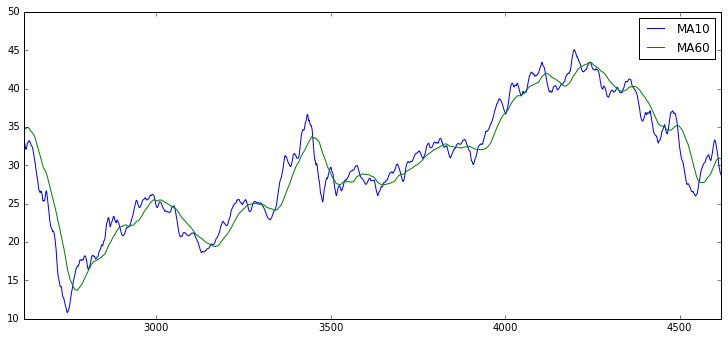

In [49]:
from IPython.core.pylabtools import figsize
figsize(12.5, 5.5)
data[["MA10","MA60"]][2621:4621].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa21a249510>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fa217094290>], dtype=object)

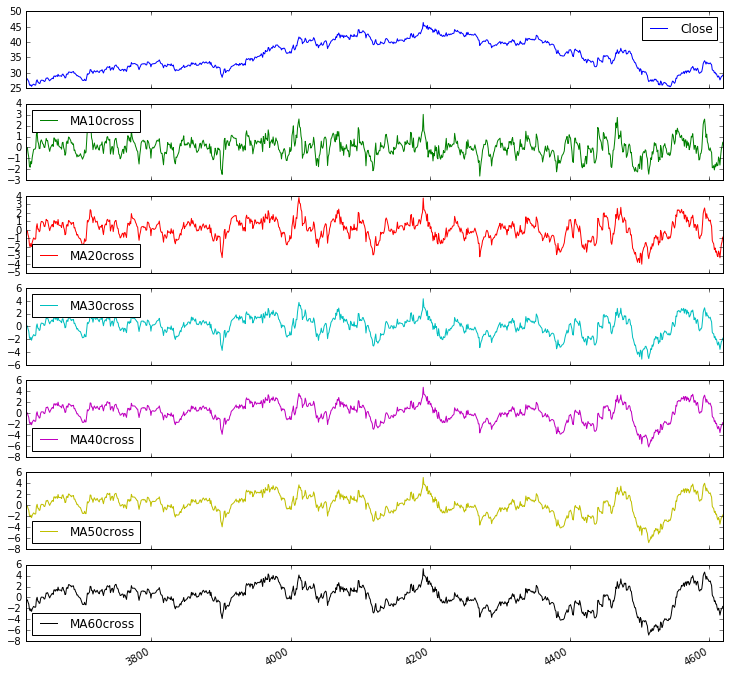

In [50]:
from IPython.core.pylabtools import figsize
figsize(12.5, 12.5)

data[["Close","MA10cross","MA20cross","MA30cross","MA40cross","MA50cross","MA60cross"]][3621:4621].plot(subplots = True)

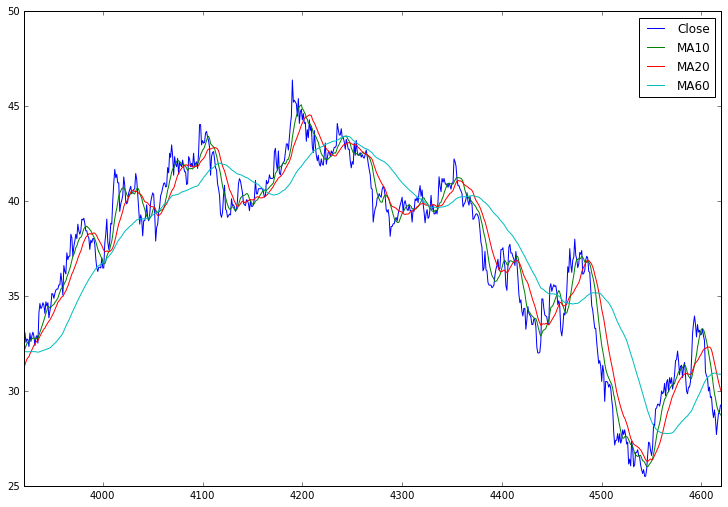

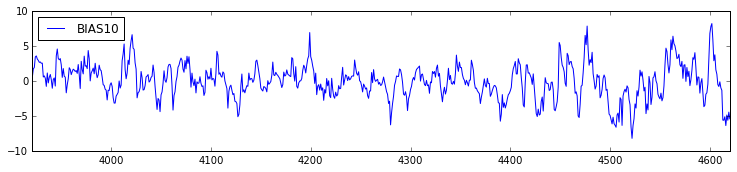

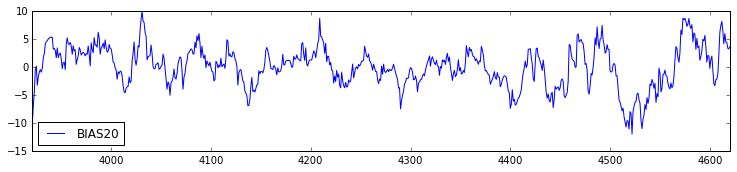

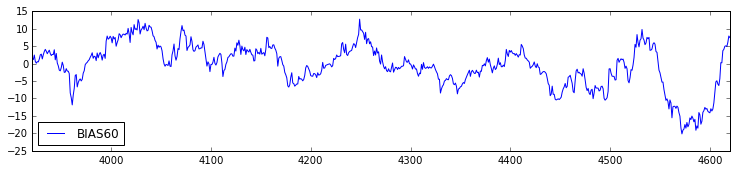

In [76]:
from IPython.core.pylabtools import figsize
figsize(12.5, 8.5)
data[["Close","MA10","MA20","MA60"]][3921:4621].plot()
figsize(12.5, 2.5)
data[["BIAS10"]][3921:4621].plot()
figsize(12.5, 2.5)
data[["BIAS20"]][3921:4621].plot()
figsize(12.5, 2.5)
data[["BIAS60"]][3921:4621].plot()
#data[[,"BIAS10" ,"BIAS20" ,"BIAS30" ,"BIAS40" ,"BIAS50" ,"BIAS60"]][3621:4621].plot(subplots = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1fb45d750>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fa1fb29a2d0>], dtype=object)

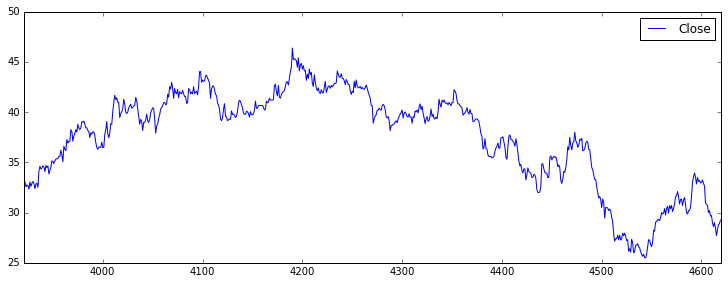

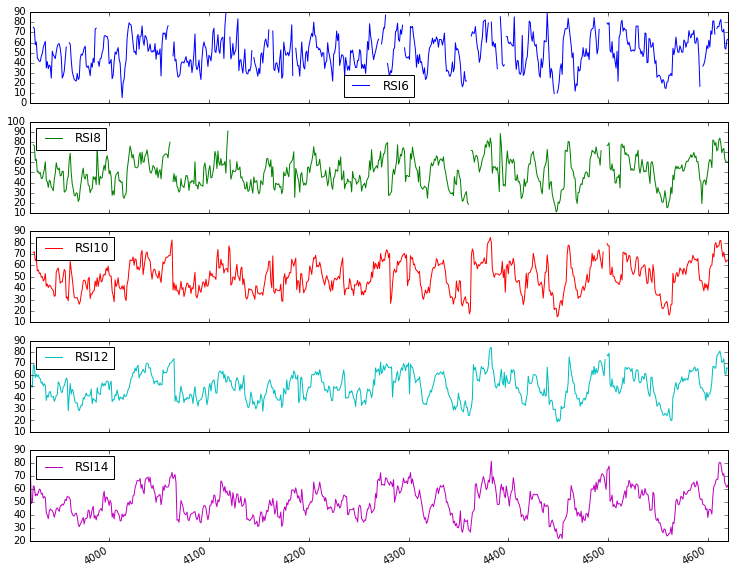

In [89]:
from IPython.core.pylabtools import figsize
figsize(12.5, 4.5)
data[["Close"]][3921:4621].plot()
figsize(12.5, 10.5)
data[["RSI6","RSI8","RSI10","RSI12","RSI14"]][3921:4621].plot(subplots = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1fafb0510>], dtype=object)

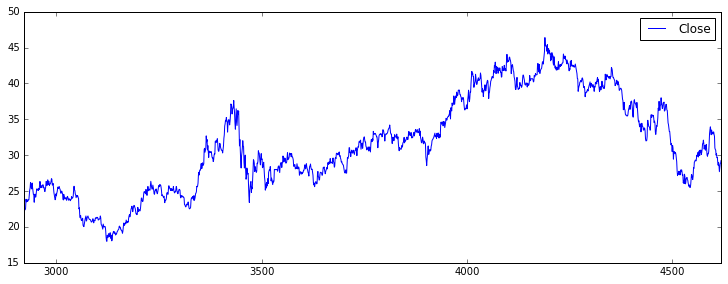

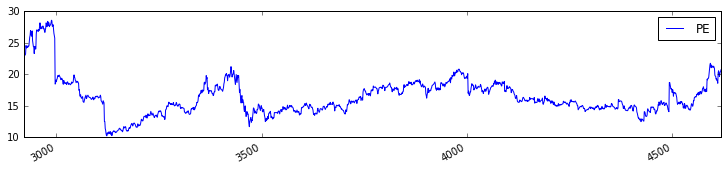

In [92]:
from IPython.core.pylabtools import figsize
figsize(12.5, 4.5)
data[["Close"]][2921:4621].plot()
figsize(12.5, 2.5)
data[["PE"]][2921:4621].plot(subplots = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1fa604890>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fa1fa3ccd90>], dtype=object)

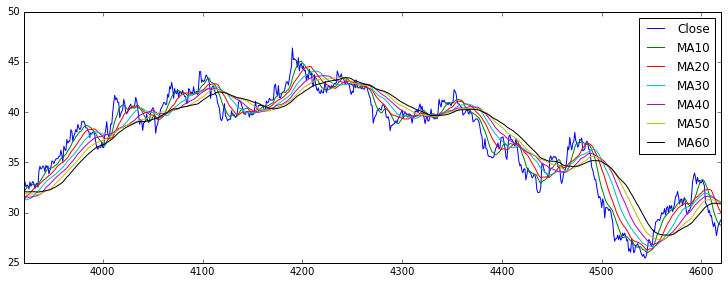

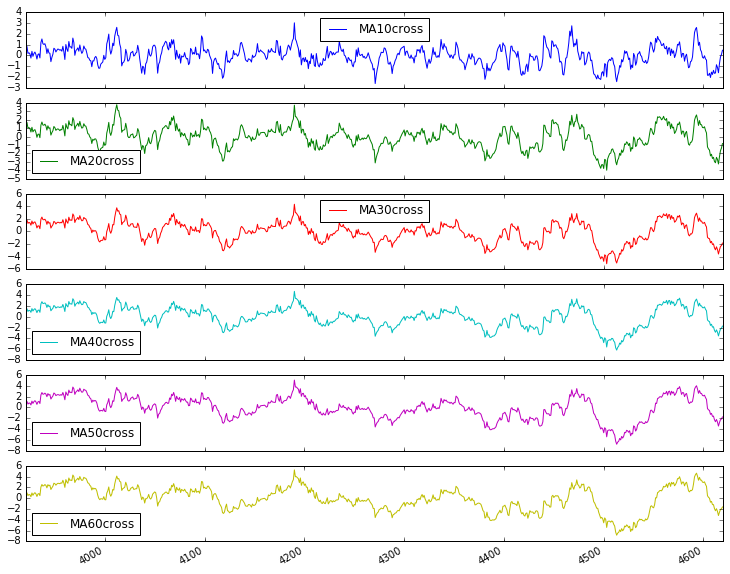

In [98]:
from IPython.core.pylabtools import figsize
figsize(12.5, 4.5)
data[["Close","MA10","MA20","MA30","MA40","MA50","MA60"]][3921:4621].plot()
figsize(12.5, 10.5)
data[["MA10cross","MA20cross","MA30cross","MA40cross","MA50cross","MA60cross"]][3921:4621].plot(subplots = True)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4621 entries, 0 to 4620
Data columns (total 60 columns):
Date         4621 non-null object
Open         4620 non-null float64
High         4620 non-null float64
Low          4620 non-null float64
Close        4620 non-null float64
Volume_n     4620 non-null float64
Volume_m     4620 non-null float64
return       4620 non-null float64
PE           4620 non-null float64
MA10         4621 non-null float64
MA20         4621 non-null float64
MA30         4621 non-null float64
MA40         4621 non-null float64
MA50         4621 non-null float64
MA60         4621 non-null float64
RR           4620 non-null float64
WMS5         4621 non-null float64
WMS9         4621 non-null float64
WMS13        4621 non-null float64
WMS17        4621 non-null float64
BR12         4621 non-null float64
BR18         4621 non-null float64
BR24         4621 non-null float64
BR30         4621 non-null float64
BR36         4621 non-null float64
AR18         4621 n

In [99]:
def UP_DOWN(data):
    data_day_number = range(data['Date'].size)
    tmpList = []
    
    for item in data_day_number:
        spread = data['Close'][item] - data['Open'][item]
        if spread > 0 :
            tmp = 1
        elif spread <= 0:
            tmp = 0
 
        tmpList.append(tmp)
    
    tmpSeries = pd.Series(tmpList)
    data['UP_DOWN']=tmpSeries

In [100]:
UP_DOWN(data)

In [101]:
data[2301:2351]

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,MA10,...,VR10,VR15,VR20,MA10cross,MA20cross,MA30cross,MA40cross,MA50cross,MA60cross,UP_DOWN
2301,2007/1/11,17.75,18.12,17.63,17.72,5246.0,153292.0,-2.35,16.51,17.948,...,321.148189,163.563576,191.397867,-0.228,-0.1065,-0.349667,-0.10775,0.1882,0.385333,0
2302,2007/1/12,18.21,18.30,18.12,18.30,11213.0,335378.0,3.27,17.05,18.000,...,271.036882,207.854823,193.774203,0.300,0.4445,0.217000,0.42725,0.7242,0.927167,1
2303,2007/1/15,18.30,18.30,17.84,17.84,3790.0,111494.0,-2.50,16.62,17.988,...,132.414563,141.185600,147.055604,-0.148,-0.0200,-0.230667,-0.06850,0.2362,0.446333,0
2304,2007/1/16,17.84,18.06,17.69,17.84,3382.0,98539.0,0.00,16.62,17.957,...,168.688613,151.046688,175.245652,-0.117,-0.0275,-0.195000,-0.10650,0.2026,0.425500,0
2305,2007/1/17,17.84,18.02,17.57,18.02,6100.0,178205.0,1.03,16.79,17.963,...,193.568421,164.910894,157.600775,0.057,0.1330,0.010667,0.02950,0.3516,0.582167,1
2306,2007/1/18,18.06,18.18,17.84,18.18,6134.0,181022.0,0.85,16.93,17.991,...,136.973891,186.321633,129.861149,0.189,0.2715,0.189000,0.16050,0.4738,0.715667,1
2307,2007/1/19,18.12,18.12,17.69,17.75,9410.0,274955.0,-2.35,16.53,17.994,...,106.739353,127.069041,130.499227,-0.244,-0.1720,-0.206333,-0.26425,0.0182,0.265333,0
2308,2007/1/22,17.75,17.90,17.51,17.87,5935.0,172077.0,0.69,16.65,18.012,...,113.012143,124.252474,133.311669,-0.142,-0.0715,-0.057667,-0.15100,0.1078,0.362000,1
2309,2007/1/23,17.69,17.99,17.69,17.90,3777.0,110838.0,0.17,16.68,17.957,...,81.372755,119.711890,122.175361,-0.057,-0.0505,-0.006333,-0.12475,0.1044,0.362000,1
2310,2007/1/24,17.93,18.12,17.78,18.12,9587.0,282785.0,1.19,16.88,17.954,...,96.409196,120.639652,123.510271,0.166,0.1600,0.227667,0.08225,0.2908,0.546833,1


In [195]:
data1 = data.drop(['Date', 'Open', 'High','Low','Close'], axis=1)

In [196]:
data1 = data1.fillna(-1)

In [197]:
data1.head()

,Volume_n,Volume_m,return,PE,MA10,MA20,MA30,MA40,MA50,MA60,...,VR10,VR15,VR20,MA10cross,MA20cross,MA30cross,MA40cross,MA50cross,MA60cross,UP_DOWN
0,1624.0,62200.0,-1.81,26.76,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
1,4952.0,187464.0,-1.32,26.41,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
2,3408.0,126192.0,-1.60,25.99,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
3,3207.0,117772.0,-1.90,25.49,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
4,3072.0,110927.0,-1.11,25.21,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0


In [198]:
cols = data1.columns.tolist()
cols

['Volume_n',
 'Volume_m',
 'return',
 'PE',
 'MA10',
 'MA20',
 'MA30',
 'MA40',
 'MA50',
 'MA60',
 'RR',
 'WMS5',
 'WMS9',
 'WMS13',
 'WMS17',
 'BR12',
 'BR18',
 'BR24',
 'BR30',
 'BR36',
 'AR18',
 'AR22',
 'AR26',
 'AR30',
 'MV3',
 'MV6',
 'MV9',
 'MV12',
 'MV15',
 'PSY7',
 'PSY13',
 'PSY19',
 'PSY25',
 'RSI6',
 'RSI8',
 'RSI10',
 'RSI12',
 'RSI14',
 'BIAS10',
 'BIAS20',
 'BIAS30',
 'BIAS40',
 'BIAS50',
 'BIAS60',
 'VR5',
 'VR10',
 'VR15',
 'VR20',
 'MA10cross',
 'MA20cross',
 'MA30cross',
 'MA40cross',
 'MA50cross',
 'MA60cross',
 'UP_DOWN']

In [199]:
#cols = [cols[1]] + cols[0:1] + cols[2:]
#data = data[cols]
data1 = data1[[cols[54]] + cols[0:53]]

In [200]:
data1.head(1)

,UP_DOWN,Volume_n,Volume_m,return,PE,MA10,MA20,MA30,MA40,MA50,...,BIAS60,VR5,VR10,VR15,VR20,MA10cross,MA20cross,MA30cross,MA40cross,MA50cross
0,0,1624.0,62200.0,-1.81,26.76,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [201]:
data2 = data1.values
data2

array([[  0.00000000e+00,   1.62400000e+03,   6.22000000e+04, ...,
         -1.00000000e+00,  -1.00000000e+00,  -1.00000000e+00],
       [  0.00000000e+00,   4.95200000e+03,   1.87464000e+05, ...,
         -1.00000000e+00,  -1.00000000e+00,  -1.00000000e+00],
       [  0.00000000e+00,   3.40800000e+03,   1.26192000e+05, ...,
         -1.00000000e+00,  -1.00000000e+00,  -1.00000000e+00],
       ..., 
       [  0.00000000e+00,   4.96600000e+03,   1.43707000e+05, ...,
         -2.24500000e+00,  -2.13750000e+00,  -2.13500000e+00],
       [  0.00000000e+00,   5.09400000e+03,   1.48848000e+05, ...,
         -1.85333333e+00,  -1.73625000e+00,  -1.76200000e+00],
       [  0.00000000e+00,  -1.00000000e+00,  -1.00000000e+00, ...,
         -1.00000000e+00,  -1.00000000e+00,  -1.00000000e+00]])

In [209]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

imputer = Imputer(missing_values=-1)

classifier = RandomForestClassifier(n_estimators=100)

pipeline = Pipeline([
    ('imp', imputer),
    ('clf', classifier),
])

In [221]:
parameter_grid = {
    'imp__strategy': ['mean', 'median'],
    'clf__max_features': [0.2, 0.5, 0.8, 1],
    'clf__max_depth': [1,3,5,7,9,None],
}

In [222]:
grid_search = GridSearchCV(pipeline, parameter_grid, cv = 5, verbose=3)
grid_search.fit(data2[0:,1:], data2[0:,0])

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] clf__max_features=0.2, clf__max_depth=1, imp__strategy=mean .....
[CV]  clf__max_features=0.2, clf__max_depth=1, imp__strategy=mean, score=0.712432 -   0.5s
[CV] clf__max_features=0.2, clf__max_depth=1, imp__strategy=mean .....
[CV]  clf__max_features=0.2, clf__max_depth=1, imp__strategy=mean, score=0.833333 -   0.5s
[CV] clf__max_features=0.2, clf__max_depth=1, imp__strategy=mean .....
[CV]  clf__max_features=0.2, clf__max_depth=1, imp__strategy=mean, score=0.819264 -   0.5s
[CV] clf__max_features=0.2, clf__max_depth=1, imp__strategy=mean .....
[CV]  clf__max_features=0.2, clf__max_depth=1, imp__strategy=mean, score=0.811688 -   0.5s
[CV] clf__max_features=0.2, clf__max_depth=1, imp__strategy=mean .....
[CV]  clf__max_features=0.2, clf__max_depth=1, imp__strategy=mean, score=0.818182 -   0.5s
[CV] clf__max_features=0.2, clf__max_depth=1, imp__strategy=median ...
[CV]  clf__max_features=0.2, clf__max_depth=1, imp__strat

[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:   29.0s


[CV]  clf__max_features=1, clf__max_depth=1, imp__strategy=mean, score=0.595238 -   0.6s
[CV] clf__max_features=1, clf__max_depth=1, imp__strategy=mean .......
[CV]  clf__max_features=1, clf__max_depth=1, imp__strategy=mean, score=0.595238 -   0.3s
[CV] clf__max_features=1, clf__max_depth=1, imp__strategy=mean .......
[CV]  clf__max_features=1, clf__max_depth=1, imp__strategy=mean, score=0.595238 -   0.3s
[CV] clf__max_features=1, clf__max_depth=1, imp__strategy=mean .......
[CV]  clf__max_features=1, clf__max_depth=1, imp__strategy=mean, score=0.595238 -   0.3s
[CV] clf__max_features=1, clf__max_depth=1, imp__strategy=median .....
[CV]  clf__max_features=1, clf__max_depth=1, imp__strategy=median, score=0.594595 -   0.3s
[CV] clf__max_features=1, clf__max_depth=1, imp__strategy=median .....
[CV]  clf__max_features=1, clf__max_depth=1, imp__strategy=median, score=0.601732 -   0.3s
[CV] clf__max_features=1, clf__max_depth=1, imp__strategy=median .....
[CV]  clf__max_features=1, clf__max_

[Parallel(n_jobs=1)]: Done 127 tasks       | elapsed:  3.6min


[CV]  clf__max_features=0.2, clf__max_depth=7, imp__strategy=median, score=0.846320 -   1.6s
[CV] clf__max_features=0.2, clf__max_depth=7, imp__strategy=median ...
[CV]  clf__max_features=0.2, clf__max_depth=7, imp__strategy=median, score=0.807359 -   1.6s
[CV] clf__max_features=0.2, clf__max_depth=7, imp__strategy=median ...
[CV]  clf__max_features=0.2, clf__max_depth=7, imp__strategy=median, score=0.788961 -   1.8s
[CV] clf__max_features=0.5, clf__max_depth=7, imp__strategy=mean .....
[CV]  clf__max_features=0.5, clf__max_depth=7, imp__strategy=mean, score=0.784865 -   5.1s
[CV] clf__max_features=0.5, clf__max_depth=7, imp__strategy=mean .....
[CV]  clf__max_features=0.5, clf__max_depth=7, imp__strategy=mean, score=0.656926 -   4.8s
[CV] clf__max_features=0.5, clf__max_depth=7, imp__strategy=mean .....
[CV]  clf__max_features=0.5, clf__max_depth=7, imp__strategy=mean, score=0.838745 -   5.1s
[CV] clf__max_features=0.5, clf__max_depth=7, imp__strategy=mean .....
[CV]  clf__max_feature

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 11.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('imp', Imputer(axis=0, copy=True, missing_values=-1, strategy='mean', verbose=0)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'clf__max_features': [0.2, 0.5, 0.8, 1], 'clf__max_depth': [1, 3, 5, 7, 9, None], 'imp__strategy': ['mean', 'median']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [226]:
sorted(grid_search.grid_scores_, key = lambda x: x.mean_validation_score)
grid_search.best_score_,grid_search.best_params_

(0.84224193897424804,
 {'clf__max_depth': 1, 'clf__max_features': 0.8, 'imp__strategy': 'mean'})

In [228]:
#data1.columns.tolist()[1:53]
data1[data1.columns.tolist()[1]].median(),data1[data1.columns.tolist()[1]].mean()

(10047.0, 14543.352088292577)

In [229]:
for i in data1.columns.tolist():
    #print(i ,data[i])
    data1[i] = data1[i].map(lambda x : data1[i].mean() if x == -1 else x)

In [230]:
data_ml = data1.values

In [231]:
X = data_ml[:,1:]
Y = data_ml[:,0]

In [232]:
n = len(data_ml)/2
n

2310

In [233]:
X_train = X[:n, :]
Y_train = Y[:n]

X_test = X[n:, :]
Y_test = Y[n:]

In [243]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, max_depth = 1, max_features = 0.8)
model = model.fit(X_train, Y_train)
Y_prediction = model.predict(X_test)

print "prediction accuracy:", np.sum(Y_test == Y_prediction)*1./len(Y_test)

prediction accuracy: 0.812635222847


In [174]:
#model.estimators_#所有的tree

In [244]:
model.feature_importances_ #各feature的重要性

array([ 0.  ,  0.  ,  0.52,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.44,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.03,  0.01,  0.  ,  0.  ,  0.  ])

In [245]:
data1.columns

Index([u'UP_DOWN', u'Volume_n', u'Volume_m', u'return', u'PE', u'MA10',
       u'MA20', u'MA30', u'MA40', u'MA50', u'MA60', u'RR', u'WMS5', u'WMS9',
       u'WMS13', u'WMS17', u'BR12', u'BR18', u'BR24', u'BR30', u'BR36',
       u'AR18', u'AR22', u'AR26', u'AR30', u'MV3', u'MV6', u'MV9', u'MV12',
       u'MV15', u'PSY7', u'PSY13', u'PSY19', u'PSY25', u'RSI6', u'RSI8',
       u'RSI10', u'RSI12', u'RSI14', u'BIAS10', u'BIAS20', u'BIAS30',
       u'BIAS40', u'BIAS50', u'BIAS60', u'VR5', u'VR10', u'VR15', u'VR20',
       u'MA10cross', u'MA20cross', u'MA30cross', u'MA40cross', u'MA50cross'],
      dtype='object')

In [246]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [247]:
cm = confusion_matrix(Y_test, Y_prediction)
cm

array([[1152,  166],
       [ 267,  726]])

In [248]:
pd.crosstab(Y_test, Y_prediction, rownames=['actual'], colnames=['preds'])

preds,0.0,1.0
actual,,
0.0,1152,166
1.0,267,726


In [249]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #tick_marks = np.arange(len(iris.target_names))
    #plt.xticks(tick_marks, iris.target_names, rotation=45)
    #plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

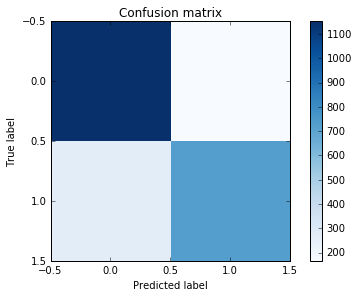

In [250]:
plot_confusion_matrix(cm)
plt.show()

In [251]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import StratifiedKFold
from scipy import interp

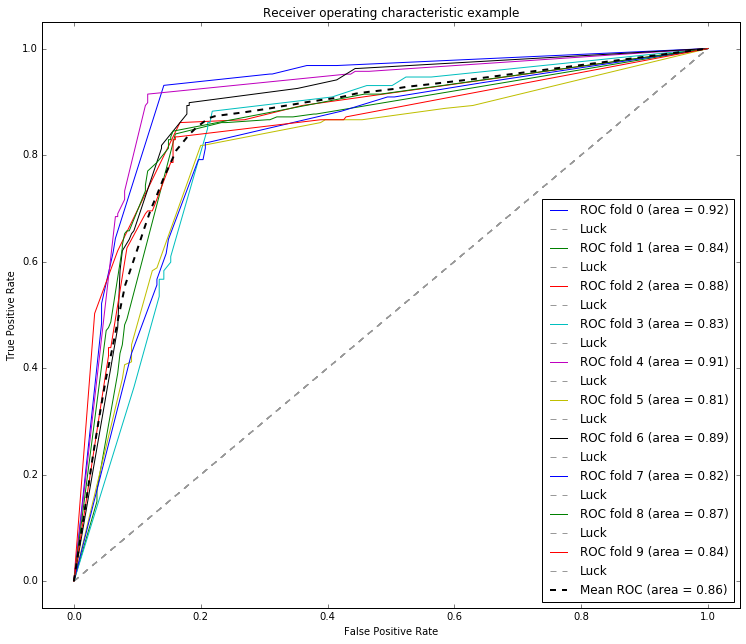

In [252]:
from IPython.core.pylabtools import figsize
figsize(12.5, 10.5)
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
cv = StratifiedKFold(Y, n_folds=10)

for i, (train, test) in enumerate(cv):
    probas_ = model.fit(X[train], Y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [253]:
result = np.c_[Y_test,Y_prediction]
result1 = pd.DataFrame(result , columns = ['test', 'prediction'])
result1.head()

,test,prediction
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,1.0,0.0
4,0.0,0.0


## 當沖(用開盤價買進收盤價賣出)

In [254]:
n #從測試資料的第2311筆開始
#len(data)

2310

In [255]:
data_p = data[['Close','Open']][2310:4621].values

In [256]:
data_p1 = pd.DataFrame(data_p,columns = ['Close','Open'])
#data_p1

In [257]:
result2 = pd.concat([data_p1, result1], axis=1)
result2.head()

,Close,Open,test,prediction
0,18.12,17.93,1.0,1.0
1,17.81,18.24,0.0,0.0
2,17.51,17.69,0.0,0.0
3,17.51,17.45,1.0,0.0
4,17.35,17.51,0.0,0.0


In [258]:
result2["Cl - Op"] = result2['Close'] - result2['Open']
#result2 = result2.drop(['Cl-Op'],axis = 1)

In [259]:
result2.head()

,Close,Open,test,prediction,Cl - Op
0,18.12,17.93,1.0,1.0,0.19
1,17.81,18.24,0.0,0.0,-0.43
2,17.51,17.69,0.0,0.0,-0.18
3,17.51,17.45,1.0,0.0,0.06
4,17.35,17.51,0.0,0.0,-0.16


In [260]:
result2['profit'] = result2['Cl - Op'] * result2['prediction']

In [261]:
a = result2['profit'].cumsum()
result2['cumsum'] = a
result2.head()

,Close,Open,test,prediction,Cl - Op,profit,cumsum
0,18.12,17.93,1.0,1.0,0.19,0.19,0.19
1,17.81,18.24,0.0,0.0,-0.43,-0.00,0.19
2,17.51,17.69,0.0,0.0,-0.18,-0.00,0.19
3,17.51,17.45,1.0,0.0,0.06,0.00,0.19
4,17.35,17.51,0.0,0.0,-0.16,-0.00,0.19


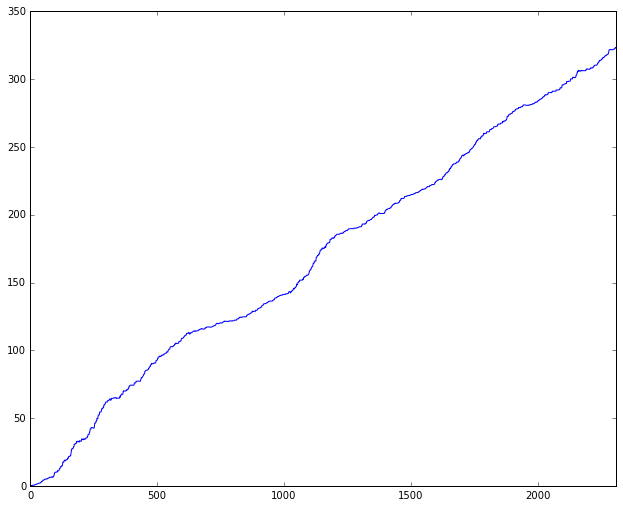

In [262]:
from IPython.core.pylabtools import figsize
figsize(10.5, 8.5)
a.plot()

In [263]:
2*result2['prediction'].sum() # 交易次數

1784.0

## 手續費
買進價格千分之1.425
賣出價格千分之4.425

In [264]:
result2['processing fee'] = (result2['Close']*(1.425/1000.0) + result2['Open']*(4.425/1000.0)) * result2['prediction']

In [265]:
result2['profit_r_fee'] = result2['profit'] - result2['processing fee']

In [266]:
result2.head()

,Close,Open,test,prediction,Cl - Op,profit,cumsum,processing fee,profit_r_fee
0,18.12,17.93,1.0,1.0,0.19,0.19,0.19,0.105161,0.084839
1,17.81,18.24,0.0,0.0,-0.43,-0.00,0.19,0.000000,-0.000000
2,17.51,17.69,0.0,0.0,-0.18,-0.00,0.19,0.000000,-0.000000
3,17.51,17.45,1.0,0.0,0.06,0.00,0.19,0.000000,0.000000
4,17.35,17.51,0.0,0.0,-0.16,-0.00,0.19,0.000000,-0.000000


In [267]:
b = result2['profit_r_fee'].cumsum()
result2['cumsum_r_fee'] = b
result2.head()

,Close,Open,test,prediction,Cl - Op,profit,cumsum,processing fee,profit_r_fee,cumsum_r_fee
0,18.12,17.93,1.0,1.0,0.19,0.19,0.19,0.105161,0.084839,0.084839
1,17.81,18.24,0.0,0.0,-0.43,-0.00,0.19,0.000000,-0.000000,0.084839
2,17.51,17.69,0.0,0.0,-0.18,-0.00,0.19,0.000000,-0.000000,0.084839
3,17.51,17.45,1.0,0.0,0.06,0.00,0.19,0.000000,0.000000,0.084839
4,17.35,17.51,0.0,0.0,-0.16,-0.00,0.19,0.000000,-0.000000,0.084839


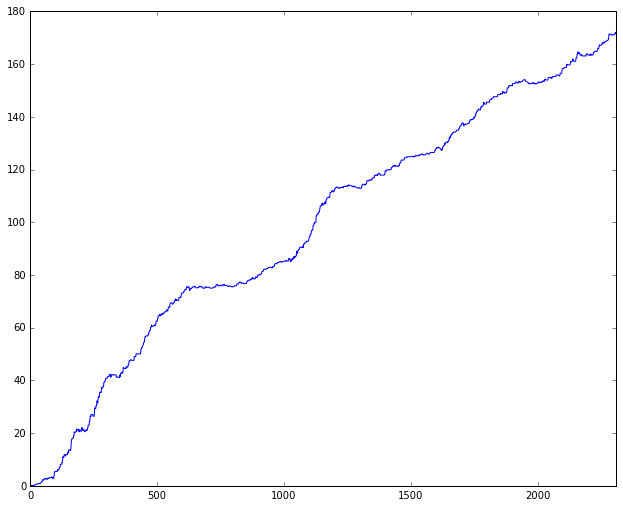

In [268]:
from IPython.core.pylabtools import figsize
figsize(10.5, 8.5)
result2['cumsum_r_fee'].plot()

### 預測隔天漲：開盤價買進，下一天再預測漲則繼續持有
### 預測隔天跌：用收盤價賣出

In [269]:
result2['profit2'] = 0.0
#len(result2)
result2['profit2'][1]

0.0

In [270]:
result2.head()

,Close,Open,test,prediction,Cl - Op,profit,cumsum,processing fee,profit_r_fee,cumsum_r_fee,profit2
0,18.12,17.93,1.0,1.0,0.19,0.19,0.19,0.105161,0.084839,0.084839,0.0
1,17.81,18.24,0.0,0.0,-0.43,-0.00,0.19,0.000000,-0.000000,0.084839,0.0
2,17.51,17.69,0.0,0.0,-0.18,-0.00,0.19,0.000000,-0.000000,0.084839,0.0
3,17.51,17.45,1.0,0.0,0.06,0.00,0.19,0.000000,0.000000,0.084839,0.0
4,17.35,17.51,0.0,0.0,-0.16,-0.00,0.19,0.000000,-0.000000,0.084839,0.0


In [271]:
result2['profit2'][0] = (-1) * result2['Open'][0]

for i in range(len(result2)-1):
    if result2['prediction'][i+1] == 1 and result2['prediction'][i] == 0:
        result2['profit2'][i+1] = result2['profit2'][i] + (-1) * result2['Open'][i+1]
    elif result2['prediction'][i+1] == 1 and result2['prediction'][i] == 1:
        result2['profit2'][i+1] = result2['profit2'][i]
    elif result2['prediction'][i+1] == 0 and result2['prediction'][i] == 1:
        result2['profit2'][i+1] = result2['profit2'][i] + result2['Close'][i]
    elif result2['prediction'][i+1] == 0 and result2['prediction'][i] == 0:
        result2['profit2'][i+1] = result2['profit2'][i]

In [272]:
#result2['profit2']

In [273]:
if result2['prediction'][1] == 0.0 and result2['prediction'][2] == 0.0:
    result2['profit2'][2] = result2['profit2'][2] + (-1) * result2['Open'][2]

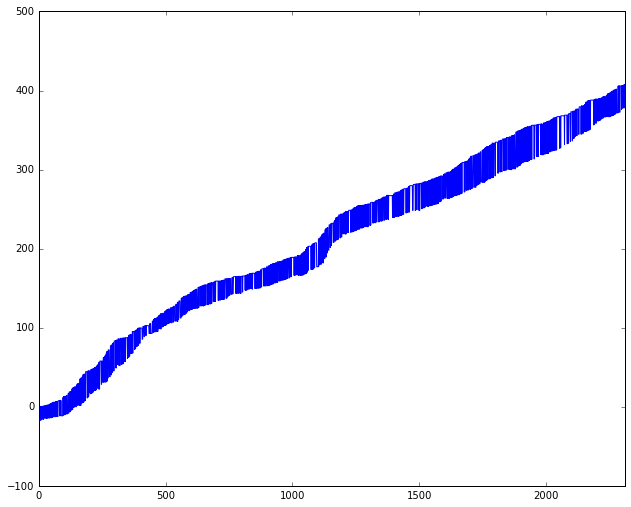

In [274]:
result2['profit2'].plot()

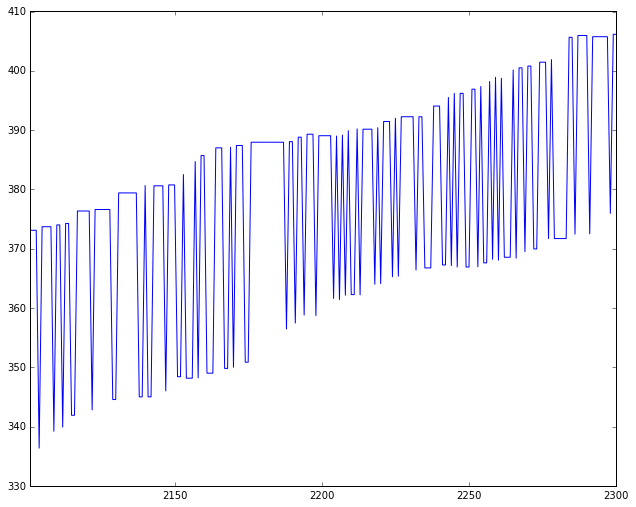

In [275]:
result2['profit2'][2101:2301].plot()

In [153]:
data.to_csv('data1', sep=' ', encoding='utf-8')